Populating the interactive namespace from numpy and matplotlib
Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  360
Nodes: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 11), (3, 12), (3, 13), (3, 14), (3, 19), (4, 5), (4, 6), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 8), (5, 9), (5, 10), (5, 11), (

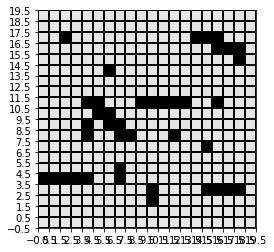

In [1]:
%pylab inline
n, m = 20,20  # number of rows and columns respectively.
# to convert to coppeliasim, the origin of the graph needs to be moved up and over 10 by 10
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((n,m))

grid_cells[4][0] = 1;
grid_cells[4][1] = 1;
grid_cells[4][2] = 1;
grid_cells[4][3] = 1;
grid_cells[4][4] = 1;
grid_cells[17][2] = 1;
grid_cells[14][6] = 1;
grid_cells[8][4] = 1;
grid_cells[9][4] = 1;
grid_cells[5][7] = 1;
grid_cells[4][7] = 1;
grid_cells[8][12] = 1;
grid_cells[7][15] = 1;
grid_cells[11][16] = 1;
grid_cells[2][10] = 1;
grid_cells[3][10] = 1;
grid_cells[3][15] = 1;
grid_cells[3][16] = 1;
grid_cells[3][17] = 1;
grid_cells[3][18] = 1;
grid_cells[11][9] = 1;
grid_cells[11][10] = 1;
grid_cells[11][11] = 1;
grid_cells[11][12] = 1;
grid_cells[11][13] = 1;
grid_cells[11][4] = 1;
grid_cells[11][5] = 1;
grid_cells[10][5] = 1;
grid_cells[10][6] = 1;
grid_cells[9][6] = 1;
grid_cells[9][7] = 1;
grid_cells[8][7] = 1;
grid_cells[8][8] = 1;
grid_cells[15][18] = 1;
grid_cells[16][17] = 1;
grid_cells[16][18] = 1;
grid_cells[16][16] = 1;
grid_cells[17][16] = 1;
grid_cells[17][15] = 1;
grid_cells[17][14] = 1;


# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = matplotlib.colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid_cells, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));

draw_grid()

import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid_cells[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
print("Nodes:", G.nodes())

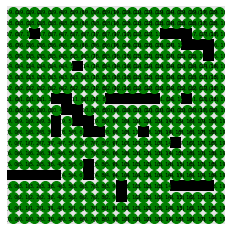

In [2]:
# Plot grid
draw_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=5, with_labels=True, node_size=100, node_color="g")

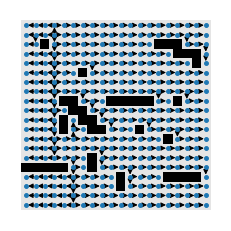

In [4]:
start_node =  (1, 3)
end_node = (18,17)

# Run BFS to generate a tree
bfs_tree = nx.bfs_tree(G, source=start_node)

# plot the result of BFS
draw_grid()
nx.draw(bfs_tree, pos = pos, node_size=15)

[(18, 3), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (18, 15), (18, 16), (18, 17)]
[(6.5, -8.5), (5.5, -8.5), (4.5, -8.5), (3.5, -8.5), (2.5, -8.5), (1.5, -8.5), (0.5, -8.5), (-0.5, -8.5), (-1.5, -8.5), (-2.5, -8.5), (-3.5, -8.5), (-4.5, -8.5), (-5.5, -8.5), (-6.5, -8.5), (-7.5, -8.5)]


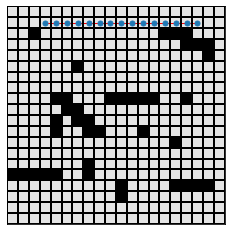

In [5]:
# Pick the last element and iterate through its predecessors
path = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]

# Correct path
print(path)

#Convert to coppeliasim points here
#1,3 -> 7.6,8.5
c_path = [];
for coord in path:
    x = 9.5-coord[1]
    y = 9.5-coord[0]
    
    c_path.append((x,y))
    
print(c_path)
    
# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]

draw_grid()
nx.draw_networkx_nodes(path, pos, node_size=25)
nx.draw_networkx_edges(G, nodelist=path, edgelist=E, pos=pos,edge_color='r')